In [1]:
import pandas as pd

In [2]:
amazon = pd.read_csv('data/amzn_stock.csv', index_col='Date')
amazon.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829


In [3]:
daily_return = amazon.Close.pct_change()
daily_return.head(10)  # 10 days change

Date
2010-01-04         NaN
2010-01-05    0.005900
2010-01-06   -0.018116
2010-01-07   -0.017013
2010-01-08    0.027077
2010-01-11   -0.024041
2010-01-12   -0.022715
2010-01-13    0.013820
2010-01-14   -0.013632
2010-01-15   -0.001649
Name: Close, dtype: float64

<AxesSubplot:>

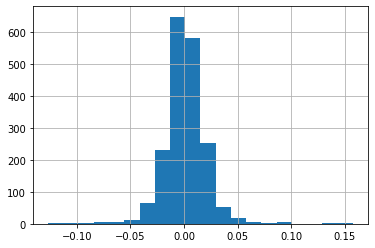

In [5]:
daily_return = daily_return.dropna()
daily_return.hist(bins=20)

In [6]:
mean, std = daily_return.mean(), daily_return.std()

In [7]:
abs_z_score = daily_return.sub(mean).abs().div(std)

In [10]:
pcts = [abs_z_score.lt(i).mean() for i in range(1,4)]
print('{:.3f} fall within 1 standard deviation. \n'
'{:.3f} within 2 \nand {:.3f} within 3'.format(*pcts))

0.787 fall within 1 standard deviation. 
0.956 within 2 
and 0.985 within 3


In [11]:
def test_return_normality(stock_data):
    close = stock_data['Close']
    daily_return = close.pct_change().dropna()
    daily_return.hist(bins=20)
    mean = daily_return.mean()
    std = daily_return.std()
    abs_z_score = abs(daily_return - mean) / std
    pcts = [abs_z_score.lt(i).mean() for i in range(1,4)]
    print('{:.3f} fall within 1 standard deviation. \n'
    '{:.3f} within 2 \nand {:.3f} within 3'.format(*pcts))

0.742 fall within 1 standard deviation. 
0.946 within 2 
and 0.986 within 3


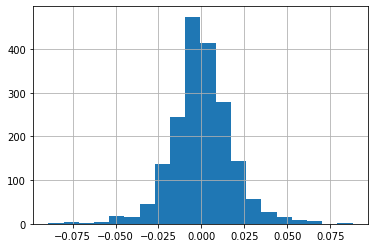

In [12]:
slb = pd.read_csv('data/slb_stock.csv', index_col='Date', parse_dates=['Date'])
test_return_normality(slb)

0.765 fall within 1 standard deviation. 
0.951 within 2 
and 0.984 within 3


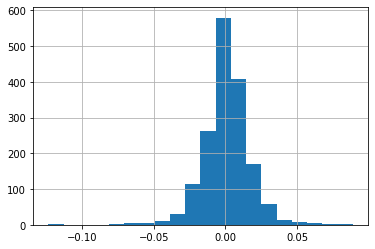

In [13]:
aapl = pd.read_csv('data/aapl_stock.csv', index_col='Date', parse_dates=['Date'])
test_return_normality(aapl)